In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
from IPython.display import display, Latex
from matplotlib import cm
import math
from tqdm import tqdm
from matplotlib.animation import FuncAnimation 

# Taller 3: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

## 2. Tensor de Inercia de una estrella naciente

Para un sistema de $N$ partículas con masa $m_k$ y posiciones $r_k$, el tensor de inercia se define como:
$$
I = \sum_{k=1}^{N}m_{k}((r_{k} \cdot r_{k} ) E - r_{k}\otimes r_{k} ) 
$$

**a)** Muestre que el tensor de inercia para esta estrella está dado por:

$$
 I = \begin{pmatrix}
 1.1163 \times 10 ^{4} &  2.0524 \times 10^{0}  & 7.4286 \times 10^{-1}  \\ 
 2.0524 \times 10^{0} & 8.9520 \times 10^3 &  −2.3483 \times 10^3  \\ 
7.4286 \times 10^{-1}    & −2.3483 \times 10^3 & 4.2341 \times 10^3 
\end{pmatrix}
$$


In [2]:
#Primero importamos los datos del archivo CuerposCelestes.dat
file_ = 'data/CuerposCelestes.dat'
r = np.loadtxt(file_, comments='#')
X = r[:,0]
Y = r[:,1]
Z = r[:,2]

In [3]:
def KroneckerProd(v,w):
    MProd = np.ones((len(v), len(w)))
    for i in range(len(v)):
        for j in range(len(w)):
            MProd[i,j] = v[i]*w[j]
    return MProd

def InerciaTensor(m , r):
    E = np.identity(len(r[0]))
    I = np.zeros((len(r[0]), len(r[0])))
    for k in range(len(m)):
        I += m[k]* ((np.dot(r[k], r[k].T)*E)-KroneckerProd(r[k], r[k]))
    return I

M = np.ones(len(r))
I = InerciaTensor(M , r)
print(I)

[[ 1.11638178e+04  2.05248547e+00  7.42865762e-01]
 [ 2.05248547e+00  8.95207032e+03 -2.34834623e+03]
 [ 7.42865762e-01 -2.34834623e+03  4.23411270e+03]]


**b)** Encuentre los auto-valores y auto-vectores. Si dos valores propios son cercanos o iguales ¿Qué interpretación tienen los auto-valores respecto a las simetrías de este sistema?

In [4]:
eigenValues, eigenVectors = np.linalg.eig(I)
for i in range(len(eigenValues)):
    display(Latex(r'$\lambda_{'+str(i+1)+ '} = '+ str(eigenValues[i])+' $'))
for i in range(len(eigenValues)):
    display(Latex(r'$v_{'+str(i+1)+ '} = ('+str(eigenVectors[i][0])+', \; \; \;' +str(eigenVectors[i][1])+',\; \; \;' +str(eigenVectors[i][2])+')$ '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**c)** Haga una gráfica en 3D de las estrella, los eigenvectores de la estrella y la estrella sobre sus ejes principales.

Primero calculamos la matriz de rotación $T$ asociada la transformación de cambio de base entre $B = \{v_{1}, v_{2}, v_{3} \}$ y $B' =  \{ e_{1}, e_{2}, e_{3} \}$ donde $B$ es la base correspondiente a los ejes principales del cuerpo (eigenvectores ya calculados) y $B'$ es la base canónica. Por definición, esta matríz está dada por:
$$
 T = \begin{pmatrix}
e_{1} \cdot v_{1} & e_{1} \cdot v_{2} & e_{1} \cdot v_{3} \\ 
e_{2} \cdot v_{1} & e_{2} \cdot v_{2} & e_{2} \cdot v_{3} \\ 
e_{3} \cdot v_{1} & e_{3} \cdot v_{2} & e_{3} \cdot v_{3}
\end{pmatrix}
$$


In [5]:
Base1 = [[1, 0, 0], [0, 1, 0],  [0, 0 , 1]]
T = np.zeros((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        T[i,j] = np.dot(eigenVectors[j], Base1[i])
print(T)

[[ 9.99999139e-01  1.27176354e-03 -3.23776435e-04]
 [ 1.29907114e-03 -9.24310243e-01  3.81639736e-01]
 [-1.86085626e-04  3.81639828e-01  9.24311099e-01]]


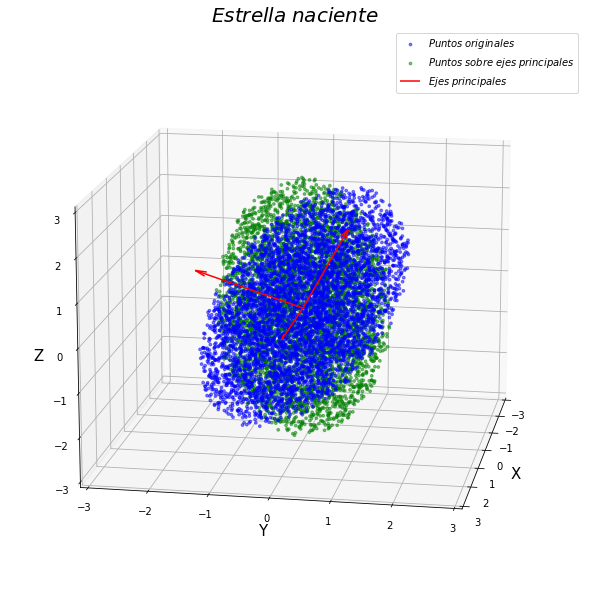

In [26]:
rNewAxes = np.dot(T, r.T)

soa = np.array([[0, 0, 0, eigenVectors[0][0], eigenVectors[0][1],eigenVectors[0][2]], 
                [0, 0, 0, eigenVectors[1][0], eigenVectors[1][1],eigenVectors[1][2]],
                [0, 0, 0, eigenVectors[2][0], eigenVectors[2][1],eigenVectors[2][2]],])

O1, O2, O3 , U, V, W = zip(*soa)
fs = 15

fig = plt.figure( figsize = (10, 8))
ax = Axes3D(fig, elev = 15, azim = 10)
ax.scatter(X, Y, Z, color = 'b', marker='.', s = 30, alpha = 0.5, label=r'$Puntos\; originales$')
ax.scatter(rNewAxes[0], rNewAxes[1], rNewAxes[2], color = 'g', marker='.', s = 30, alpha = 0.5, label=r'$Puntos \; sobre \;ejes \;principales$')
ax.quiver(O1, O2, O3, U, V, W, color = 'r', pivot='tail',length= 2,arrow_length_ratio=0.1, label = r'$Ejes \;principales$')
ax.set_title(r'$Estrella \; naciente$', fontsize = fs+5)
ax.set_xlabel('X', fontsize = fs)
ax.set_ylabel('Y', fontsize = fs)
ax.set_zlabel('Z', fontsize = fs)
ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)
ax.legend(loc='best')
plt.show()